In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Initialising Framework (TensorFlow)

!pip install tensorflow==2.9.1

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
import pandas as pd

# Define the directory path containing the training data
train_data_dir = '/content/drive/MyDrive/Citrus-Fruit-Disease/train'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Iterate through subdirectories (folds) within the training data directory
for fold in os.listdir(train_data_dir):
    foldpath = os.path.join(train_data_dir, fold)

    # Check if the subdirectory is a valid directory
    if os.path.isdir(foldpath):
        # List all files within the current subdirectory (fold)
        for file in os.listdir(foldpath):
            # Create the full file path by joining the subdirectory path and the file name
            fpath = os.path.join(foldpath, file)

            # Append the file path to the list of filepaths
            filepaths.append(fpath)

            # Append the subdirectory name (fold) as the label
            labels.append(fold)

# Create Pandas Series for filepaths and labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate data paths with labels into one DataFrame
train_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
# Display the training dataset DataFrame
train_df

,filepaths,labels
0,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,black-spot
1,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,black-spot
2,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,black-spot
3,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,black-spot
4,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,black-spot
...,...,...
2027,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,citrus-canker
2028,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,citrus-canker
2029,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,citrus-canker
2030,/content/drive/MyDrive/Citrus-Fruit-Disease/tr...,citrus-canker


In [ ]:
# Define the directory path containing the testing data
test_data_dir = '/content/drive/MyDrive/Citrus-Fruit-Disease/test'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Iterate through subdirectories (folds) within the testing data directory
for fold in os.listdir(test_data_dir):
    foldpath = os.path.join(test_data_dir, fold)

    # Check if the subdirectory is a valid directory
    if os.path.isdir(foldpath):
        # List all files within the current subdirectory (fold)
        for file in os.listdir(foldpath):
            # Create the full file path by joining the subdirectory path and the file name
            fpath = os.path.join(foldpath, file)

            # Append the file path to the list of filepaths
            filepaths.append(fpath)

            # Append the subdirectory name (fold) as the label
            labels.append(fold)

# Create Pandas Series for filepaths and labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate data paths with labels into one DataFrame
test_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the test DataFrame into validation and test DataFrames
valid_df, test_df = train_test_split(test_df, train_size=0.5, shuffle=True, random_state=123)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size and image dimensions
batch_size = 16
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Create data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

# Create data generators from dataframes
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
)

valid_gen = valid_datagen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size,
)


Found 2032 validated image filenames belonging to 2 classes.
Found 203 validated image filenames belonging to 2 classes.
Found 204 validated image filenames belonging to 2 classes.


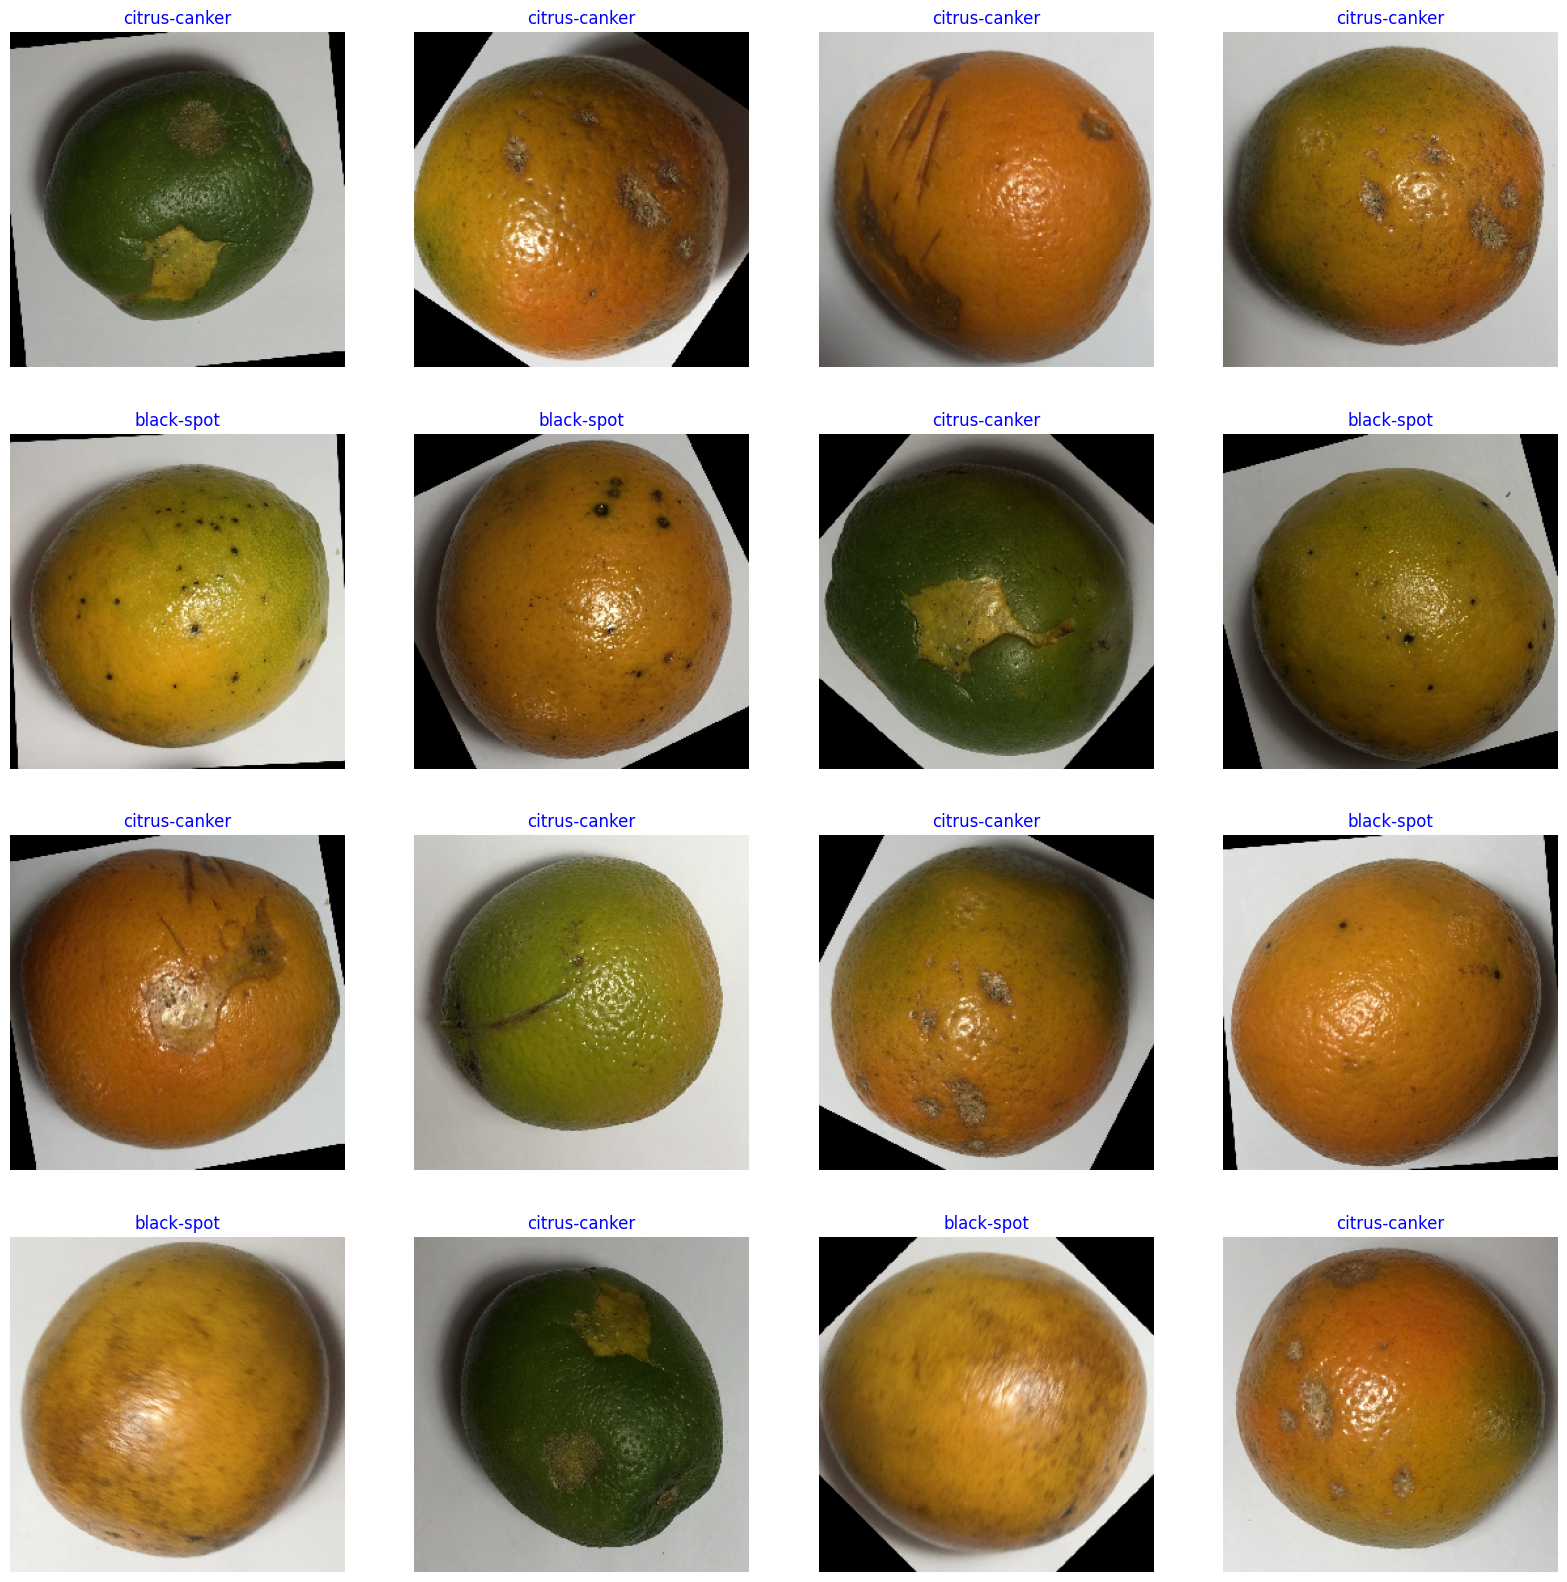

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the class indices from the generator
g_dict = train_gen.class_indices

# Get the list of class names
classes = list(g_dict.keys())

# Get a batch of image samples and labels from the generator
images, labels = next(train_gen)

# Create a figure for plotting
plt.figure(figsize=(20, 20))

# Iterate through the batch of images
for i in range(16):
    plt.subplot(4, 4, i + 1)

    # Scale the image data to the range [0, 1]
    image = images[i] / 255

    # Display the image
    plt.imshow(image)

    # Get the index of the true class label for the image
    index = np.argmax(labels[i])

    # Get the class name corresponding to the index
    class_name = classes[index]

    # Set the title of the subplot with the class name
    plt.title(class_name, color='blue', fontsize=12)

    # Turn off axis labels
    plt.axis('off')

# Show the plot
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.regularizers import l1, l2

# Define image dimensions and number of channels
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Determine the number of classes based on the training generator's class indices
class_count = len(train_gen.class_indices)

# Create the base model (EfficientNetB3) with pretrained weights from ImageNet
base_model = EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

# Create the custom model architecture
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.3, epsilon=0.001),
    Dense(256, kernel_regularizer=l2(l=0.016), activity_regularizer=l1(0.005), bias_regularizer=l1(0.005), activation='relu'),
    Dropout(rate=0.5, seed=125),
    Dense(class_count, activation='softmax')
])

# Compile the model with the specified optimizer, loss function, and metrics
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11,183,665
Trainable params: 11,093,290
Non

In [ ]:
epochs = 10  # Number of epochs for training

# Train the model and store the training history
history = model.fit(
    x=train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    validation_steps=None,
    shuffle=False
)

Epoch 1/10
127/127 [==============================] - 551s 4s/step - loss: 6.5028 - accuracy: 0.9016 - val_loss: 5.1427 - val_accuracy: 0.9507
Epoch 2/10
127/127 [==============================] - 176s 1s/step - loss: 4.4126 - accuracy: 0.9592 - val_loss: 3.7054 - val_accuracy: 0.9852
Epoch 3/10
127/127 [==============================] - 176s 1s/step - loss: 3.2712 - accuracy: 0.9769 - val_loss: 2.8243 - val_accuracy: 0.9852
Epoch 4/10
127/127 [==============================] - 176s 1s/step - loss: 2.5405 - accuracy: 0.9793 - val_loss: 2.1937 - val_accuracy: 0.9951
Epoch 5/10
127/127 [==============================] - 176s 1s/step - loss: 2.0021 - accuracy: 0.9823 - val_loss: 1.7432 - val_accuracy: 0.9951
Epoch 6/10
127/127 [==============================] - 176s 1s/step - loss: 1.5857 - accuracy: 0.9877 - val_loss: 1.3790 - val_accuracy: 1.0000
Epoch 7/10
127/127 [==============================] - 176s 1s/step - loss: 1.2419 - accuracy: 0.9956 - val_loss: 1.0846 - val_accuracy: 0.9951

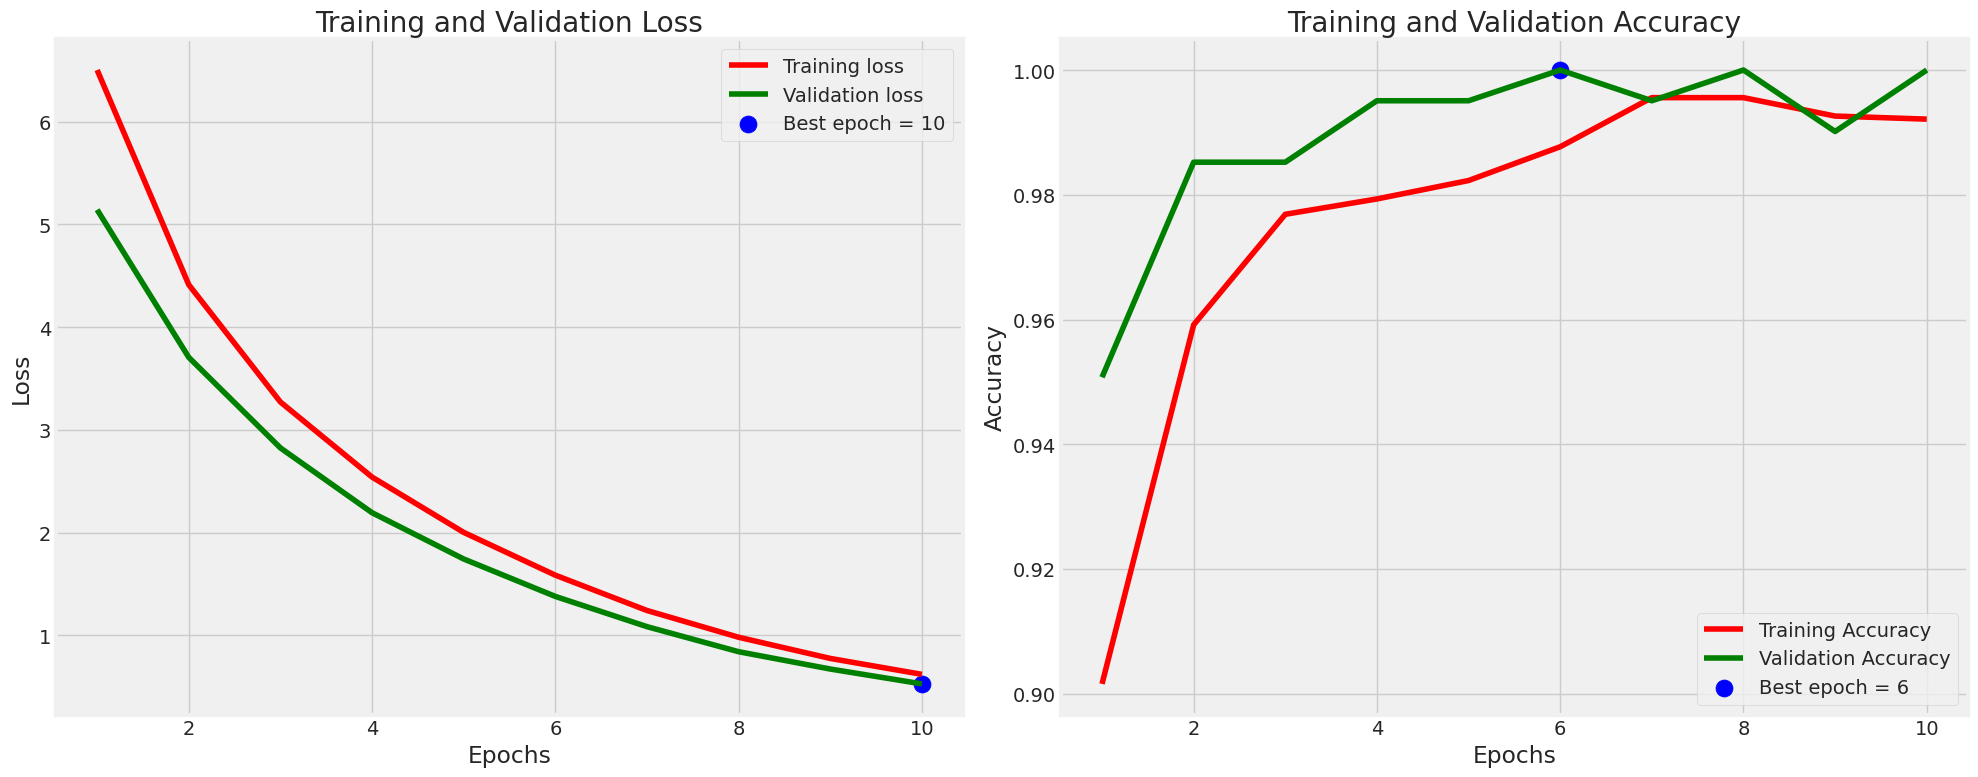

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract training history metrics
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Find the epoch with the lowest validation loss
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

# Find the epoch with the highest validation accuracy
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

# Create a list of epochs
Epochs = [i + 1 for i in range(len(tr_acc))]

# Define labels for the best epoch
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

# Create a figure for plotting
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Model Evaluation

ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

3/3 [==============================] - 14s 7s/step - loss: 0.5310 - accuracy: 1.0000
Train Loss:  0.5232768058776855
Train Accuracy:  1.0
--------------------
Validation Loss:  0.5237828493118286
Validation Accuracy:  1.0
--------------------
Test Loss:  0.5310198664665222
Test Accuracy:  1.0


In [ ]:
# Generate predictions for the test dataset using the model
preds = model.predict(test_gen)

# Calculate the predicted class labels by taking the argmax of the predictions along axis 1
y_pred = np.argmax(preds, axis=1)

13/13 [==============================] - 62s 5s/step


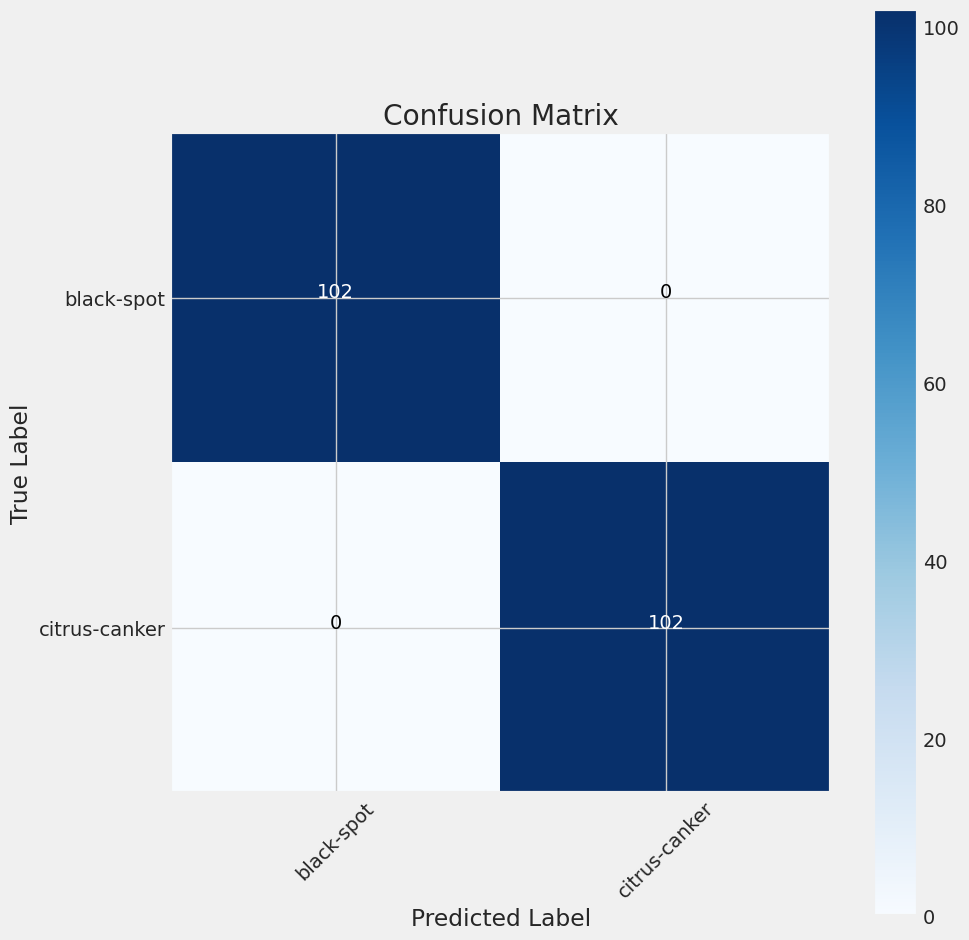

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the class indices from the test generator
g_dict = test_gen.class_indices

# Get the list of class names
classes = list(g_dict.keys())

# Calculate the confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Create a figure for plotting
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the confusion matrix plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report based on true class labels and predicted class labels
report = classification_report(test_gen.classes, y_pred, target_names=classes)

# Print the classification report
print(report)

               precision    recall  f1-score   support

   black-spot       1.00      1.00      1.00       102
citrus-canker       1.00      1.00      1.00       102

     accuracy                           1.00       204
    macro avg       1.00      1.00      1.00       204
 weighted avg       1.00      1.00      1.00       204



In [ ]:
# Save the trained model to the specified file path

model.save('/content/drive/MyDrive/Brain_Tumor_Detection_MRI.h5')